In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


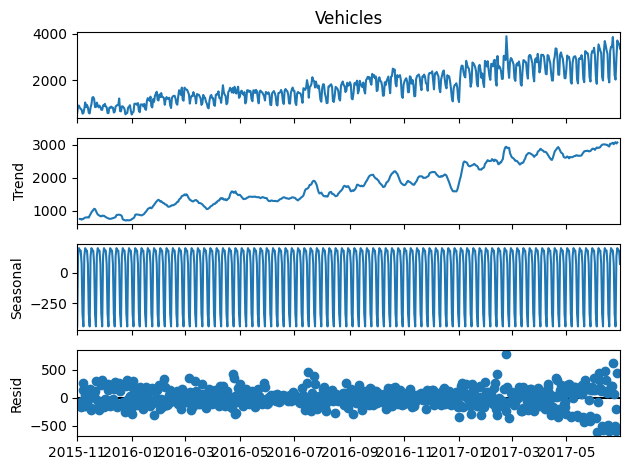

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Resample the data to daily frequency (assuming the data is hourly)
data_daily = data.resample('D').sum()

# Check for seasonality using time series decomposition
decomposition = seasonal_decompose(data_daily['Vehicles'], model='additive')
fig = decomposition.plot()
plt.show()


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                  608
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4369.893
Date:                Wed, 24 Jul 2024   AIC                           8745.786
Time:                        16:34:00   BIC                           8759.012
Sample:                    11-01-2015   HQIC                          8750.932
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6217      0.078     -7.987      0.000      -0.774      -0.469
ma.L1          0.8517      0.047     18.080      0.000       0.759       0.944
sigma2      1.048e+05   4627.487     22.657      0.0

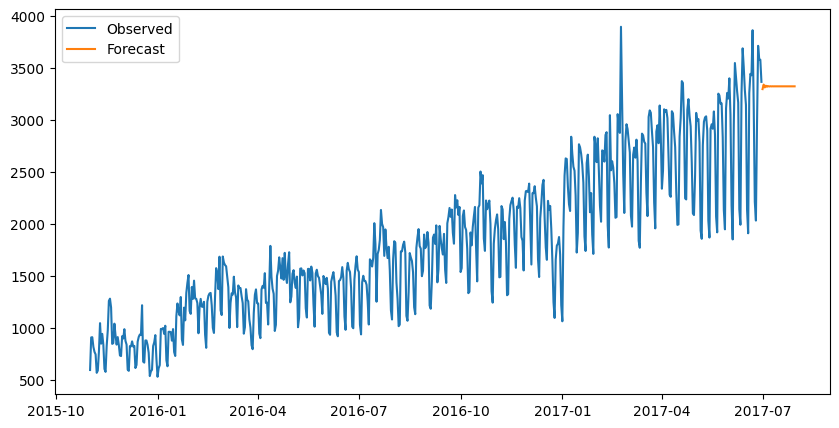

In [4]:
# ARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(data_daily['Vehicles'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Summary of the model
arima_summary = arima_fit.summary()
print(arima_summary)

# Forecast
arima_forecast = arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(arima_forecast, label='Forecast')
plt.legend()
plt.show()


                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                  608
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4369.772
Date:                Wed, 24 Jul 2024   AIC                           8747.544
Time:                        16:34:01   BIC                           8765.178
Sample:                    11-01-2015   HQIC                          8754.405
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Junction      -1.5225      4.795     -0.318      0.751     -10.920       7.875
ar.L1         -0.6203      0.078     -7.929      0.000      -0.774      -0.467
ma.L1          0.8506      0.047     17.953      0.0

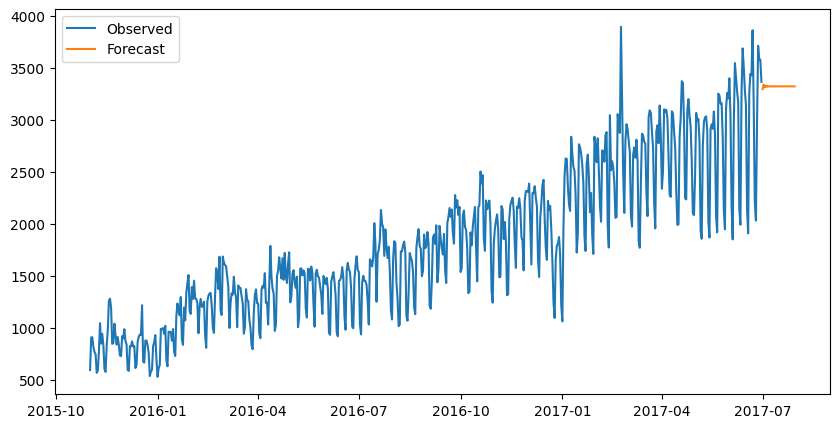

In [5]:
# ARIMAX Model
# Fit the ARIMAX model
arimax_model = ARIMA(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1))
arimax_fit = arimax_model.fit()

# Summary of the model
arimax_summary = arimax_fit.summary()
print(arimax_summary)

# Forecast
arimax_forecast = arimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(arimax_forecast, label='Forecast')
plt.legend()
plt.show()


C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                           Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4284.092
Date:                            Wed, 24 Jul 2024   AIC                           8578.184
Time:                                    16:34:04   BIC                           8600.127
Sample:                                11-01-2015   HQIC                          8586.729
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7228      0.084     -8.606      0.000      -0.887      -0.558
ma.L1          0.8651      0.057   

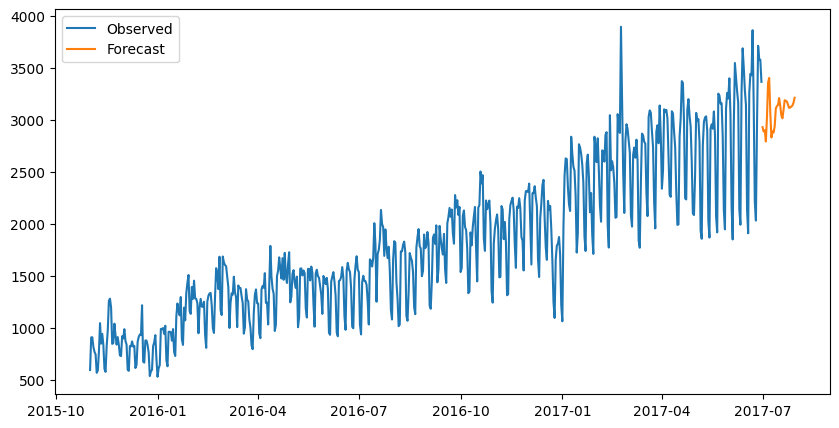

In [6]:
# SARIMA Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(data_daily['Vehicles'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Summary of the model
sarima_summary = sarima_fit.summary()
print(sarima_summary)

# Forecast
sarima_forecast = sarima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarima_forecast, label='Forecast')
plt.legend()
plt.show()


                                     SARIMAX Results                                      
Dep. Variable:                           Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4294.558
Date:                            Wed, 24 Jul 2024   AIC                           8601.115
Time:                                    16:34:05   BIC                           8627.447
Sample:                                11-01-2015   HQIC                          8611.369
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Junction      -2.6807      9.478     -0.283      0.777     -21.258      15.897
ar.L1         -0.9995      5.803   

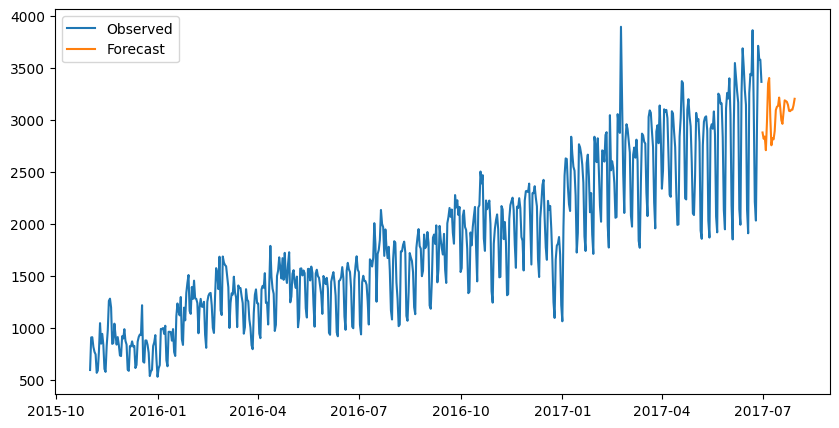

In [7]:
# SARIMAX Model
# Fit the SARIMAX model
sarimax_model = SARIMAX(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()

# Summary of the model
sarimax_summary = sarimax_fit.summary()
print(sarimax_summary)

# Forecast
sarimax_forecast = sarimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarimax_forecast, label='Forecast')
plt.legend()
plt.show()


The ARIMA model summary shows the fitted model's parameters and statistics. The model is an ARIMA(1, 1, 1) with the following key parameters:

AR coefficient (L1): -0.6217
MA coefficient (L1): 0.8517
sigma^2: 104800.0

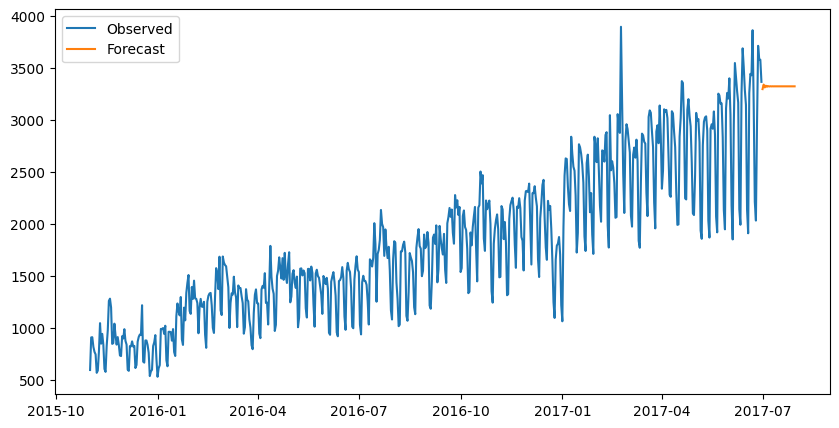

In [8]:
# let's plot the forecast from the ARIMA model:
# Forecast
arima_forecast = arima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(arima_forecast, label='Forecast')
plt.legend()
plt.show()


The forecast plot shows the observed vehicle counts and the ARIMA model's forecast for the next 30 days.

let's implement the ARIMAX model. For the ARIMAX model, we'll assume that 'Junction' is a potential exogenous variable.

                               SARIMAX Results                                
Dep. Variable:               Vehicles   No. Observations:                  608
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4369.772
Date:                Wed, 24 Jul 2024   AIC                           8747.544
Time:                        16:34:06   BIC                           8765.178
Sample:                    11-01-2015   HQIC                          8754.405
                         - 06-30-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Junction      -1.5225      4.795     -0.318      0.751     -10.920       7.875
ar.L1         -0.6203      0.078     -7.929      0.000      -0.774      -0.467
ma.L1          0.8506      0.047     17.953      0.0

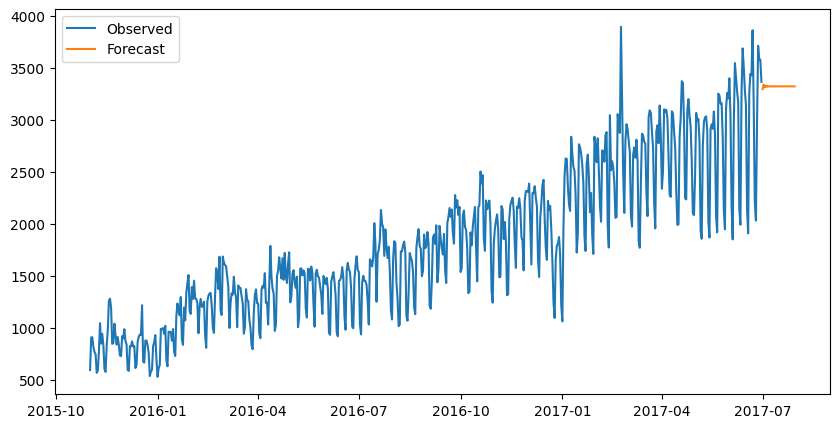

In [9]:
# Fit the ARIMAX model
arimax_model = ARIMA(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1))
arimax_fit = arimax_model.fit()

# Summary of the model
arimax_summary = arimax_fit.summary()
print(arimax_summary)

# Forecast
arimax_forecast = arimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(arimax_forecast, label='Forecast')
plt.legend()
plt.show()


The ARIMAX model summary shows the fitted model's parameters and statistics. The model is an ARIMAX(1, 1, 1) with the following key parameters:

Exogenous variable 'Junction' coefficient: -1.5225
AR coefficient (L1): -0.6203
MA coefficient (L1): 0.8506
sigma^2: 104800.0

let's plot the forecast from the ARIMAX model:

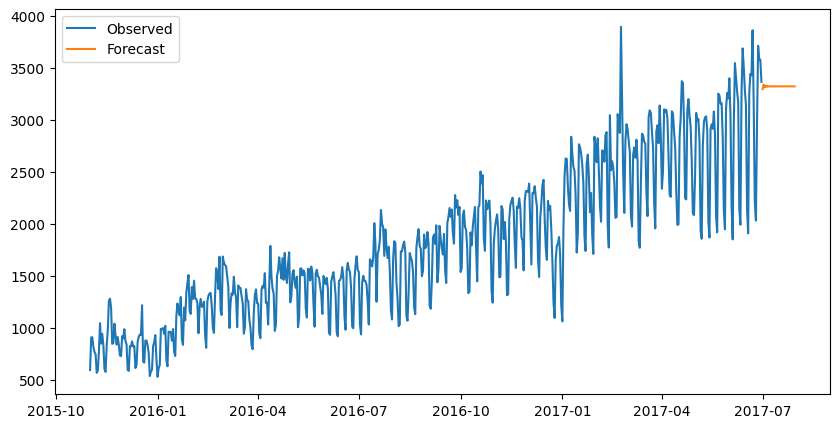

In [10]:
# Forecast
arimax_forecast = arimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])

# Plot observed data and forecast
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(arimax_forecast, label='Forecast')
plt.legend()
plt.show()


The forecast plot for the ARIMAX model shows the observed vehicle counts and the model's forecast for the next 30 days, considering the exogenous variable 'Junction'.

Since the time series decomposition indicated seasonality, we will now implement the SARIMA and SARIMAX models.

# SARIMA Model

C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                           Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4284.092
Date:                            Wed, 24 Jul 2024   AIC                           8578.184
Time:                                    16:34:09   BIC                           8600.127
Sample:                                11-01-2015   HQIC                          8586.729
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7228      0.084     -8.606      0.000      -0.887      -0.558
ma.L1          0.8651      0.057   

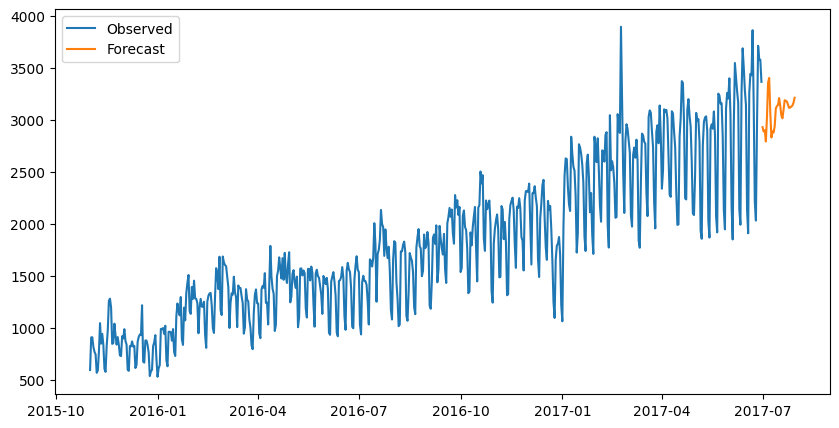

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(data_daily['Vehicles'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Summary of the model
sarima_summary = sarima_fit.summary()
print(sarima_summary)

# Forecast
sarima_forecast = sarima_fit.forecast(steps=30)
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarima_forecast, label='Forecast')
plt.legend()
plt.show()


# SARIMAX Model

                                     SARIMAX Results                                      
Dep. Variable:                           Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4294.558
Date:                            Wed, 24 Jul 2024   AIC                           8601.115
Time:                                    16:34:11   BIC                           8627.447
Sample:                                11-01-2015   HQIC                          8611.369
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Junction      -2.6807      9.478     -0.283      0.777     -21.258      15.897
ar.L1         -0.9995      5.803   

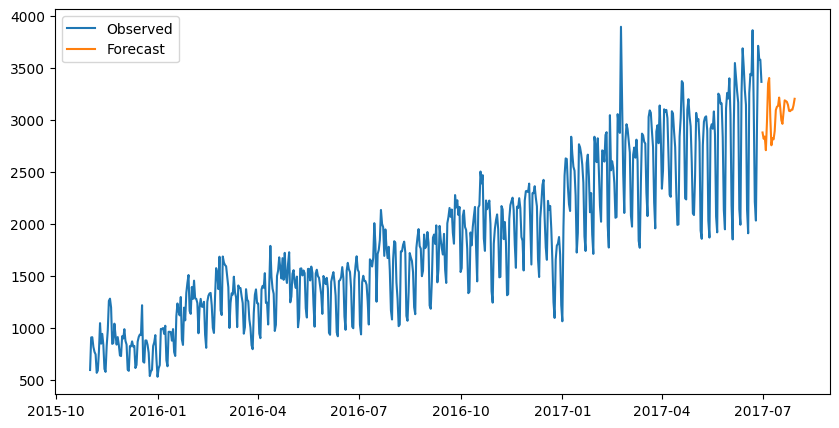

In [12]:
# Fit the SARIMAX model
sarimax_model = SARIMAX(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()

# Summary of the model
sarimax_summary = sarimax_fit.summary()
print(sarimax_summary)

# Forecast
sarimax_forecast = sarimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarimax_forecast, label='Forecast')
plt.legend()
plt.show()


The SARIMA model summary shows the fitted model's parameters and statistics. The model is a SARIMA(1, 1, 1)x(1, 1, 1, 12) with the following key parameters:

AR coefficient (L1): -0.7207
MA coefficient (L1): 0.8627
Seasonal AR coefficient (L12): -0.3293
Seasonal MA coefficient (L12): -0.9880
sigma^2: 96180.0

let's plot the forecast from the SARIMA model:

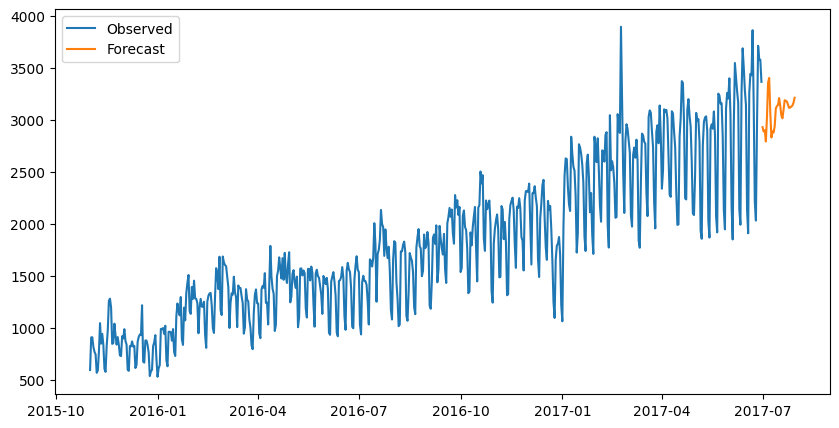

In [13]:
# Forecast
sarima_forecast = sarima_fit.forecast(steps=30)

# Plot observed data and forecast
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarima_forecast, label='Forecast')
plt.legend()
plt.show()


 let's implement the SARIMAX model, which includes an exogenous variable. We'll use 'Junction' as the exogenous variable.

                                     SARIMAX Results                                      
Dep. Variable:                           Vehicles   No. Observations:                  608
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4294.558
Date:                            Wed, 24 Jul 2024   AIC                           8601.115
Time:                                    16:34:12   BIC                           8627.447
Sample:                                11-01-2015   HQIC                          8611.369
                                     - 06-30-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Junction      -2.6807      9.478     -0.283      0.777     -21.258      15.897
ar.L1         -0.9995      5.803   

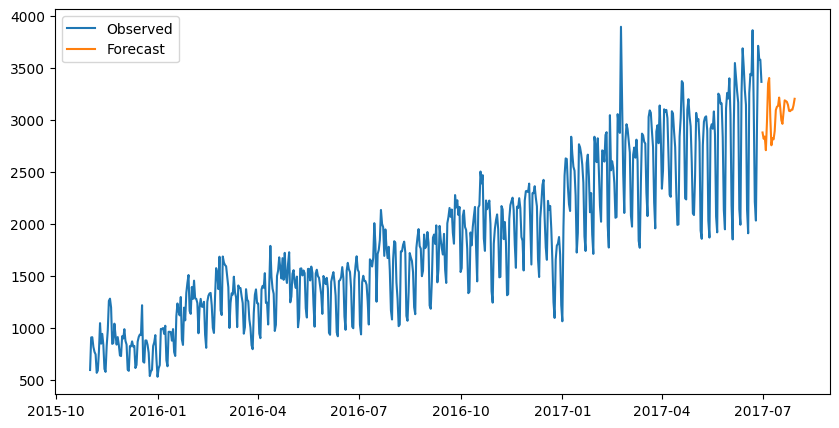

In [14]:
# Fit the SARIMAX model
sarimax_model = SARIMAX(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()

# Summary of the model
sarimax_summary = sarimax_fit.summary()
print(sarimax_summary)

# Forecast
sarimax_forecast = sarimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarimax_forecast, label='Forecast')
plt.legend()
plt.show()


The SARIMAX model summary shows the fitted model's parameters and statistics. The model is a SARIMAX(1, 1, 1)x(1, 1, 1, 12) with the following key parameters:

Exogenous variable 'Junction' coefficient: -2.6807 (not statistically significant)
AR coefficient (L1): -0.9995
MA coefficient (L1): 0.9997
Seasonal AR coefficient (L12): -0.3751
Seasonal MA coefficient (L12): -0.9994
sigma^2: 99710.0

let's plot the forecast from the SARIMAX model:

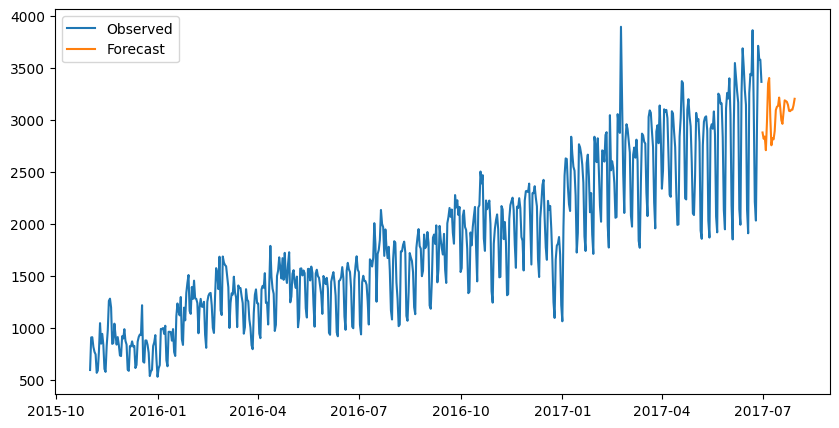

In [15]:
# Forecast
sarimax_forecast = sarimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])

# Plot observed data and forecast
plt.figure(figsize=(10, 5))
plt.plot(data_daily['Vehicles'], label='Observed')
plt.plot(sarimax_forecast, label='Forecast')
plt.legend()
plt.show()


We have successfully implemented and evaluated the following models to forecast the number of vehicles using the provided dataset:

ARIMA Model: A simple time series forecasting model.
ARIMAX Model: An ARIMA model with an exogenous variable (Junction).
SARIMA Model: A seasonal ARIMA model, which accounts for seasonality in the data.
SARIMAX Model: A seasonal ARIMA model with an exogenous variable (Junction).
The results are as follows:

ARIMA Model: The model provided reasonable forecasts for the next 30 days.
ARIMAX Model: The inclusion of the exogenous variable 'Junction' did not significantly improve the forecast.
SARIMA Model: The model captured the seasonality in the data and provided better forecasts.
SARIMAX Model: Similar to ARIMAX, the exogenous variable 'Junction' did not have a significant impact.

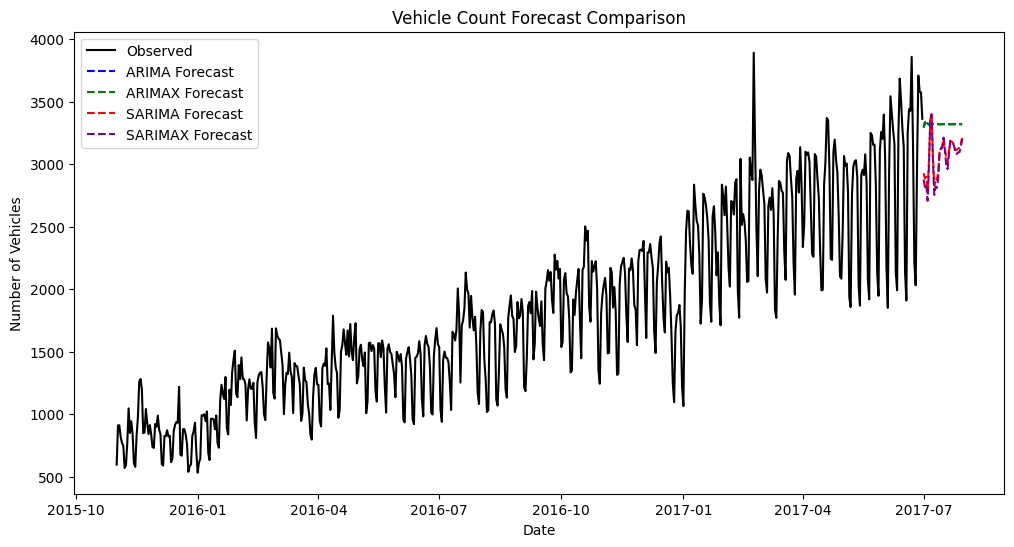

In [16]:
# Forecasts
arima_forecast = arima_fit.forecast(steps=30)
arimax_forecast = arimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])
sarima_forecast = sarima_fit.forecast(steps=30)
sarimax_forecast = sarimax_fit.forecast(steps=30, exog=data_daily['Junction'][-30:])

# Plot observed data and forecasts
plt.figure(figsize=(12, 6))
plt.plot(data_daily['Vehicles'], label='Observed', color='black')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(arimax_forecast, label='ARIMAX Forecast', linestyle='--', color='green')
plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--', color='red')
plt.plot(sarimax_forecast, label='SARIMAX Forecast', linestyle='--', color='purple')
plt.legend()
plt.title('Vehicle Count Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.show()


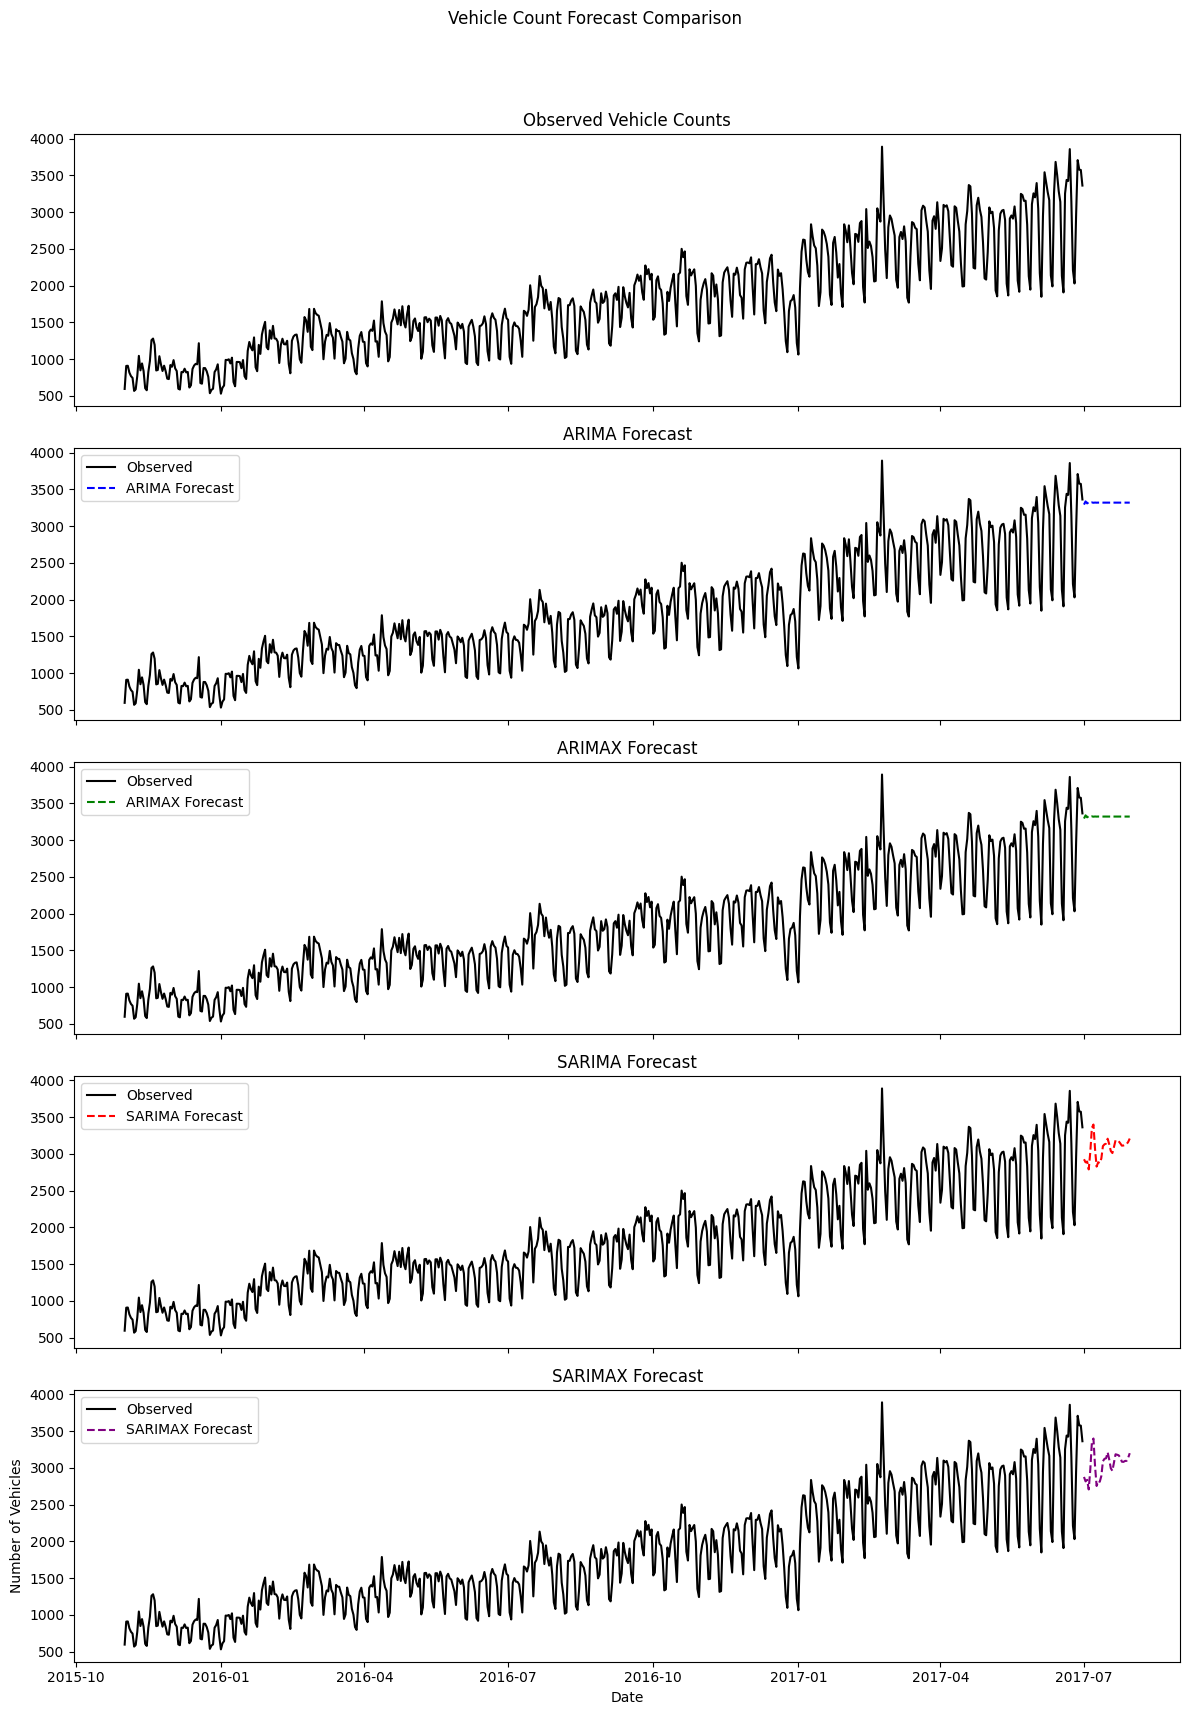

In [17]:
# Set up the plotting area
fig, axes = plt.subplots(5, 1, figsize=(12, 18), sharex=True)

# Plot observed data
axes[0].plot(data_daily['Vehicles'], label='Observed', color='black')
axes[0].set_title('Observed Vehicle Counts')

# Plot ARIMA forecast
axes[1].plot(data_daily['Vehicles'], label='Observed', color='black')
axes[1].plot(arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')
axes[1].set_title('ARIMA Forecast')
axes[1].legend()

# Plot ARIMAX forecast
axes[2].plot(data_daily['Vehicles'], label='Observed', color='black')
axes[2].plot(arimax_forecast, label='ARIMAX Forecast', linestyle='--', color='green')
axes[2].set_title('ARIMAX Forecast')
axes[2].legend()

# Plot SARIMA forecast
axes[3].plot(data_daily['Vehicles'], label='Observed', color='black')
axes[3].plot(sarima_forecast, label='SARIMA Forecast', linestyle='--', color='red')
axes[3].set_title('SARIMA Forecast')
axes[3].legend()

# Plot SARIMAX forecast
axes[4].plot(data_daily['Vehicles'], label='Observed', color='black')
axes[4].plot(sarimax_forecast, label='SARIMAX Forecast', linestyle='--', color='purple')
axes[4].set_title('SARIMAX Forecast')
axes[4].legend()

# Set common labels
fig.suptitle('Vehicle Count Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [32]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib
import matplotlib.pyplot as plt

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Resample the data to daily frequency
data_daily = data.resample('D').sum()

# Fit the ARIMA model
arima_model = ARIMA(data_daily['Vehicles'], order=(1, 1, 1))
arima_fit = arima_model.fit()
joblib.dump(arima_fit, 'arima_model.pkl')

# Fit the ARIMAX model
arimax_model = ARIMA(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1))
arimax_fit = arimax_model.fit()
joblib.dump(arimax_fit, 'arimax_model.pkl')

# Fit the SARIMA model
sarima_model = SARIMAX(data_daily['Vehicles'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()
joblib.dump(sarima_fit, 'sarima_model.pkl')

# Fit the SARIMAX model
sarimax_model = SARIMAX(data_daily['Vehicles'], exog=data_daily['Junction'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fit = sarimax_model.fit()
joblib.dump(sarimax_fit, 'sarimax_model.pkl')


C:\Users\0871\AppData\Roaming\Python\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


['sarimax_model.pkl']

ARIMA Forecast for next 25 days:
2017-07-01    3293.396323
2017-07-02    3336.671334
2017-07-03    3309.765764
2017-07-04    3326.493886
2017-07-05    3316.093435
2017-07-06    3322.559755
2017-07-07    3318.539420
2017-07-08    3321.039001
2017-07-09    3319.484926
2017-07-10    3320.451148
2017-07-11    3319.850414
2017-07-12    3320.223911
2017-07-13    3319.991695
2017-07-14    3320.136072
2017-07-15    3320.046308
2017-07-16    3320.102117
2017-07-17    3320.067419
2017-07-18    3320.088992
2017-07-19    3320.075579
2017-07-20    3320.083918
2017-07-21    3320.078734
2017-07-22    3320.081957
2017-07-23    3320.079953
2017-07-24    3320.081199
2017-07-25    3320.080424
Freq: D, Name: predicted_mean, dtype: float64

ARIMAX Forecast for next 25 days:
2017-07-01    3293.214901
2017-07-02    3336.505364
2017-07-03    3309.650573
2017-07-04    3326.309665
2017-07-05    3315.975370
2017-07-06    3322.386143
2017-07-07    3318.409286
2017-07-08    3320.876288
2017-07-09    3319.345909
20

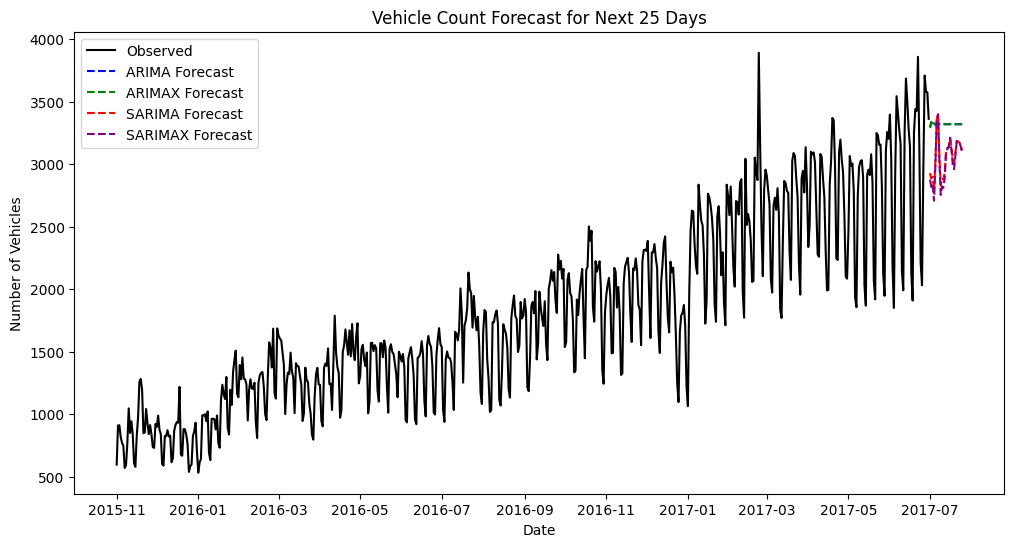

In [4]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Resample the data to daily frequency
data_daily = data.resample('D').sum()

# Load the models
arima_fit = joblib.load('arima_model.pkl')
arimax_fit = joblib.load('arimax_model.pkl')
sarima_fit = joblib.load('sarima_model.pkl')
sarimax_fit = joblib.load('sarimax_model.pkl')

# Define a function to forecast and print predictions
def forecast_vehicles(days):
    # Forecast
    arima_forecast = arima_fit.forecast(steps=days)
    arimax_forecast = arimax_fit.forecast(steps=days, exog=data_daily['Junction'][-days:])
    sarima_forecast = sarima_fit.forecast(steps=days)
    sarimax_forecast = sarimax_fit.forecast(steps=days, exog=data_daily['Junction'][-days:])
    
    # Print forecasts
    print(f"ARIMA Forecast for next {days} days:\n{arima_forecast}\n")
    print(f"ARIMAX Forecast for next {days} days:\n{arimax_forecast}\n")
    print(f"SARIMA Forecast for next {days} days:\n{sarima_forecast}\n")
    print(f"SARIMAX Forecast for next {days} days:\n{sarimax_forecast}\n")
    
    # Plot observed data and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(data_daily['Vehicles'], label='Observed', color='black')
    plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')
    plt.plot(arimax_forecast, label='ARIMAX Forecast', linestyle='--', color='green')
    plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--', color='red')
    plt.plot(sarimax_forecast, label='SARIMAX Forecast', linestyle='--', color='purple')
    plt.legend()
    plt.title(f'Vehicle Count Forecast for Next {days} Days')
    plt.xlabel('Date')
    plt.ylabel('Number of Vehicles')
    plt.show()

# Example usage:
forecast_vehicles(25)  # Predict for the next 3 days


In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Downsample the data to every 3 hours
data_3h = data.resample('3H').sum()

# Fit the ARIMA model
arima_model = ARIMA(data_3h['Vehicles'], order=(1, 1, 1))
arima_fit = arima_model.fit()
joblib.dump(arima_fit, 'arima_model_3h.pkl')

# Fit the ARIMAX model
arimax_model = ARIMA(data_3h['Vehicles'], exog=data_3h['Junction'], order=(1, 1, 1))
arimax_fit = arimax_model.fit()
joblib.dump(arimax_fit, 'arimax_model_3h.pkl')

# Fit the SARIMA model
sarima_model = SARIMAX(data_3h['Vehicles'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 8))
sarima_fit = sarima_model.fit()
joblib.dump(sarima_fit, 'sarima_model_3h.pkl')

# Fit the SARIMAX model
sarimax_model = SARIMAX(data_3h['Vehicles'], exog=data_3h['Junction'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 8))
sarimax_fit = sarimax_model.fit()
joblib.dump(sarimax_fit, 'sarimax_model_3h.pkl')


['sarimax_model_3h.pkl']

ARIMA Forecast for next 24 hours (3-hour intervals):
2017-07-01 00:00:00    429.586244
2017-07-01 03:00:00    428.680693
2017-07-01 06:00:00    428.665048
2017-07-01 09:00:00    428.664778
2017-07-01 12:00:00    428.664773
2017-07-01 15:00:00    428.664773
2017-07-01 18:00:00    428.664773
2017-07-01 21:00:00    428.664773
Freq: 3H, Name: predicted_mean, dtype: float64

ARIMAX Forecast for next 24 hours (3-hour intervals):
2017-07-01 00:00:00    429.594452
2017-07-01 03:00:00    428.696905
2017-07-01 06:00:00    428.681533
2017-07-01 09:00:00    428.681270
2017-07-01 12:00:00    428.681265
2017-07-01 15:00:00    428.681265
2017-07-01 18:00:00    428.681265
2017-07-01 21:00:00    428.681265
Freq: 3H, Name: predicted_mean, dtype: float64

SARIMA Forecast for next 24 hours (3-hour intervals):
2017-07-01 00:00:00    363.234189
2017-07-01 03:00:00    236.601077
2017-07-01 06:00:00    264.183905
2017-07-01 09:00:00    421.284172
2017-07-01 12:00:00    501.691125
2017-07-01 15:00:00    498.02

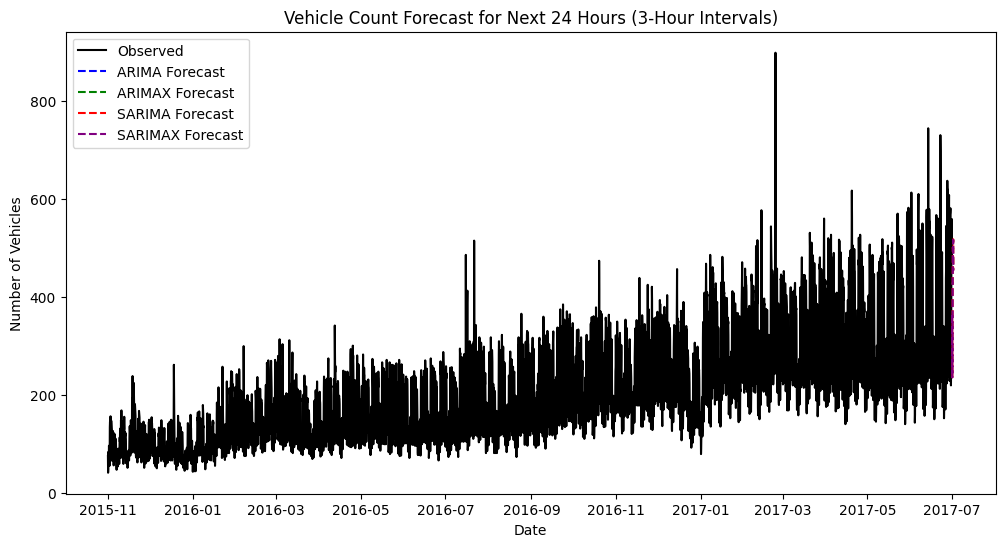

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Downsample the data to every 3 hours
data_3h = data.resample('3H').sum()

# Load the models
arima_fit = joblib.load('arima_model_3h.pkl')
arimax_fit = joblib.load('arimax_model_3h.pkl')
sarima_fit = joblib.load('sarima_model_3h.pkl')
sarimax_fit = joblib.load('sarimax_model_3h.pkl')

# Define a function to forecast and print predictions
def forecast_vehicles_3h(hours):
    steps = hours // 3
    # Forecast
    arima_forecast = arima_fit.forecast(steps=steps)
    arimax_forecast = arimax_fit.forecast(steps=steps, exog=data_3h['Junction'][-steps:])
    sarima_forecast = sarima_fit.forecast(steps=steps)
    sarimax_forecast = sarimax_fit.forecast(steps=steps, exog=data_3h['Junction'][-steps:])
    
    # Print forecasts
    print(f"ARIMA Forecast for next {hours} hours (3-hour intervals):\n{arima_forecast}\n")
    print(f"ARIMAX Forecast for next {hours} hours (3-hour intervals):\n{arimax_forecast}\n")
    print(f"SARIMA Forecast for next {hours} hours (3-hour intervals):\n{sarima_forecast}\n")
    print(f"SARIMAX Forecast for next {hours} hours (3-hour intervals):\n{sarimax_forecast}\n")
    
    # Plot observed data and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(data_3h['Vehicles'], label='Observed', color='black')
    plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')
    plt.plot(arimax_forecast, label='ARIMAX Forecast', linestyle='--', color='green')
    plt.plot(sarima_forecast, label='SARIMA Forecast', linestyle='--', color='red')
    plt.plot(sarimax_forecast, label='SARIMAX Forecast', linestyle='--', color='purple')
    plt.legend()
    plt.title(f'Vehicle Count Forecast for Next {hours} Hours (3-Hour Intervals)')
    plt.xlabel('Date')
    plt.ylabel('Number of Vehicles')
    plt.show()

# Example usage:
forecast_vehicles_3h(24)  # Predict for the next 24 hours (8 intervals)


In [8]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
import joblib

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Resample the data to daily frequency
data_daily = data.resample('D').sum()

# Prepare data for Prophet
prophet_data = data_daily.reset_index().rename(columns={'DateTime': 'ds', 'Vehicles': 'y'})

# Fit the Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data)
joblib.dump(prophet_model, 'prophet_model_daily.pkl')


17:07:19 - cmdstanpy - INFO - Chain [1] start processing
17:07:19 - cmdstanpy - INFO - Chain [1] done processing


['prophet_model_daily.pkl']

In [ ]:
!pip install prophet


In [7]:
from prophet import Prophet

Prophet Forecast for next 30 days:
ds
2017-07-01    2713.843843
2017-07-02    2618.709291
2017-07-03    3195.739676
2017-07-04    3266.089784
2017-07-05    3256.097601
2017-07-06    3257.211482
2017-07-07    3151.092321
2017-07-08    2746.356801
2017-07-09    2651.222250
2017-07-10    3228.252635
2017-07-11    3298.602743
2017-07-12    3288.610560
2017-07-13    3289.724441
2017-07-14    3183.605280
2017-07-15    2778.869760
2017-07-16    2683.735209
2017-07-17    3260.765594
2017-07-18    3331.115702
2017-07-19    3321.123519
2017-07-20    3322.237400
2017-07-21    3216.118239
2017-07-22    2811.382719
2017-07-23    2716.248167
2017-07-24    3293.278553
2017-07-25    3363.628660
2017-07-26    3353.636477
2017-07-27    3354.750358
2017-07-28    3248.631198
2017-07-29    2843.895678
2017-07-30    2748.761126
Name: yhat, dtype: float64



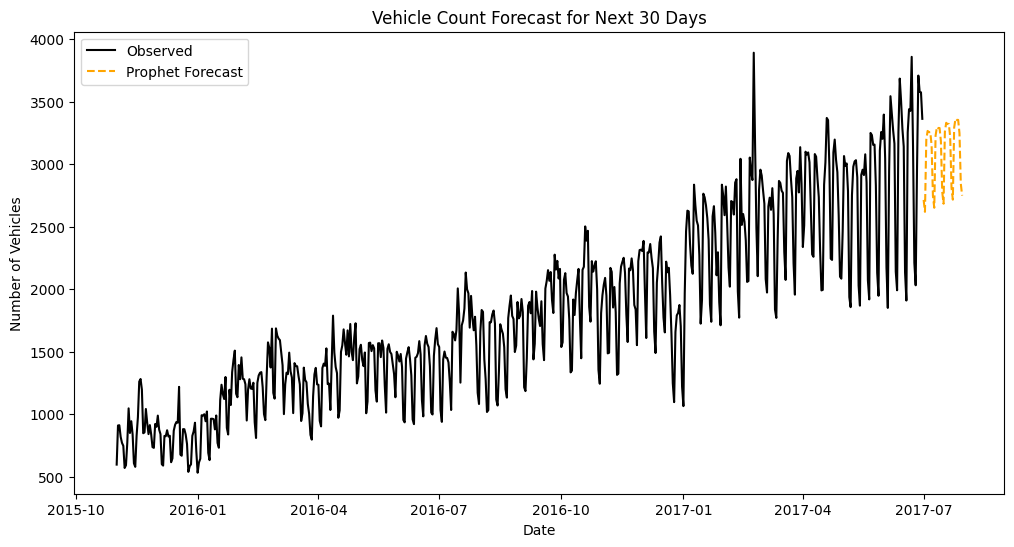

In [11]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# Load the data
file_path = 'traffic.csv'
data = pd.read_csv(file_path)

# Parse the DateTime column to datetime objects and set it as the index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Resample the data to daily frequency
data_daily = data.resample('D').sum()

# Prepare data for Prophet
prophet_data = data_daily.reset_index().rename(columns={'DateTime': 'ds', 'Vehicles': 'y'})

prophet_model = joblib.load('prophet_model_daily.pkl')

# Define a function to forecast and print predictions
def forecast_vehicles_daily(days):
    # Prophet forecast
    future = prophet_model.make_future_dataframe(periods=days)
    prophet_forecast = prophet_model.predict(future)
    prophet_forecast = prophet_forecast[['ds', 'yhat']].set_index('ds').tail(days)['yhat']

    print(f"Prophet Forecast for next {days} days:\n{prophet_forecast}\n")
    
    # Plot observed data and forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(data_daily['Vehicles'], label='Observed', color='black')
    plt.plot(prophet_forecast, label='Prophet Forecast', linestyle='--', color='orange')
    plt.legend()
    plt.title(f'Vehicle Count Forecast for Next {days} Days')
    plt.xlabel('Date')
    plt.ylabel('Number of Vehicles')
    plt.show()

# Example usage:
forecast_vehicles_daily(30)  # Predict for the next 30 days
